In [1]:
import numpy as np;

In [2]:
x = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [3]:
counts = {}
for label in np.unique(y):
    counts[label] = x[y == label].sum(axis=0)
print("Частоты признаков:\n{}".format(counts))

Частоты признаков:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [4]:
import mglearn
import matplotlib.pyplot as plt

d:\codeproj\bstu\sklearn\labs\venv\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
d:\codeproj\bstu\sklearn\labs\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


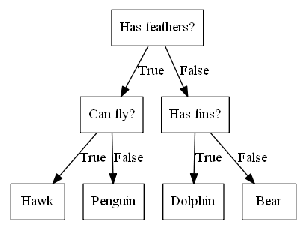

In [5]:
mglearn.plots.plot_animal_tree()

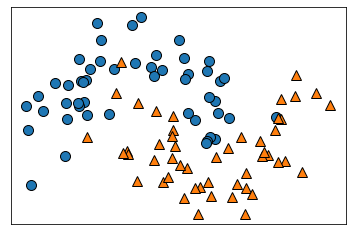

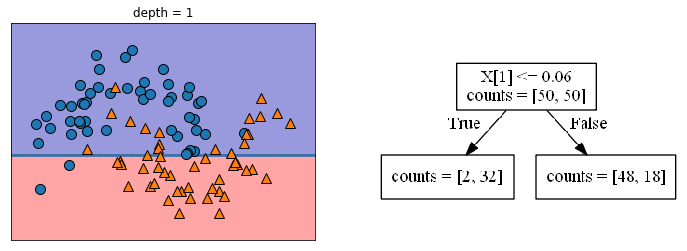

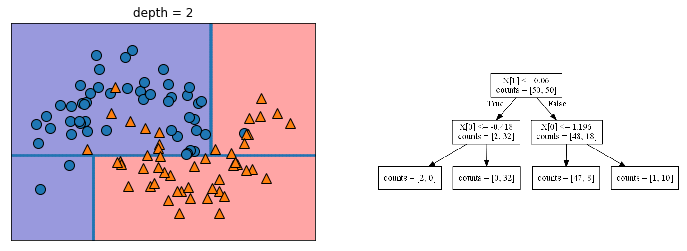

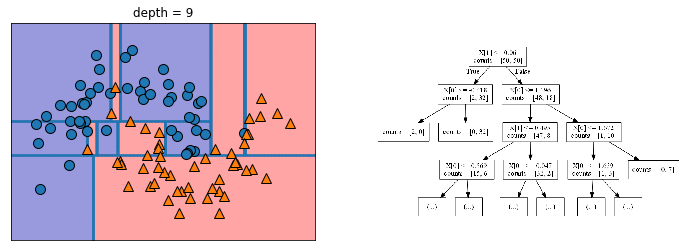

In [9]:
mglearn.plots.plot_tree_progressive()

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(x_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(x_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


In [29]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(tree.score(x_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(x_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


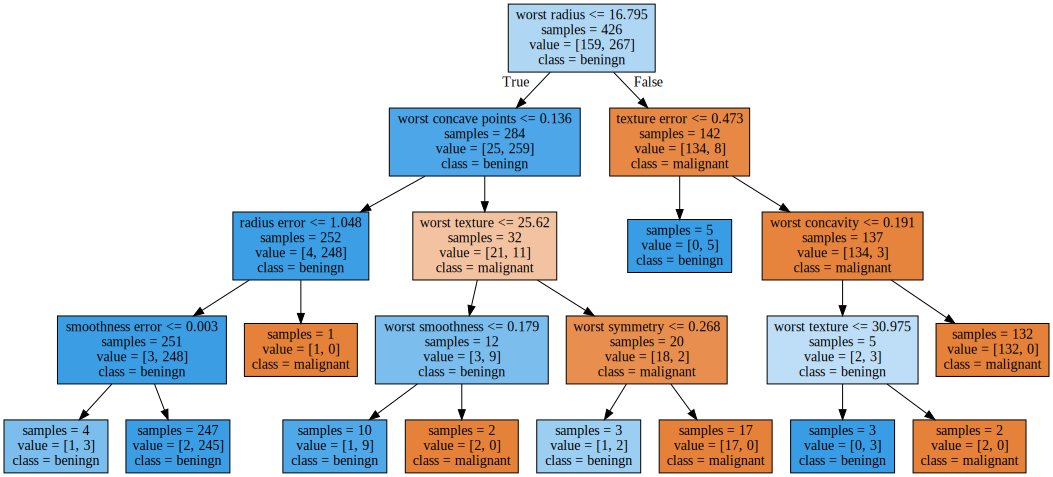

In [31]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "beningn"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [33]:
print("Важности признаков:\n{}".format(tree.feature_importances_))

Важности признаков:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


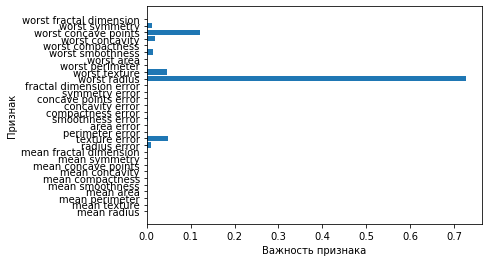

In [36]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


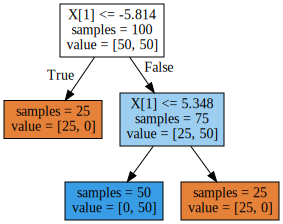

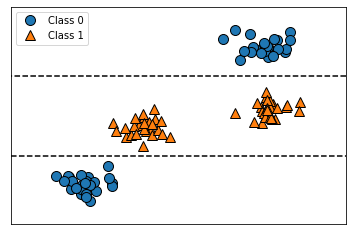

In [39]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Цена$/Мбайт')

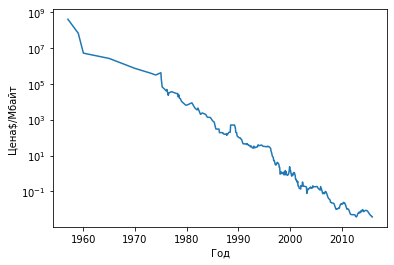

In [46]:
import pandas as pd
ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена$/Мбайт")

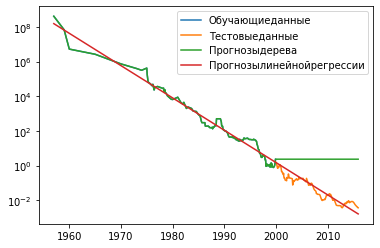

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

x_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree= np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label="Обучающиеданные")
plt.semilogy(data_test.date, data_test.price, label="Тестовыеданные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозыдерева")
plt.semilogy(ram_prices.date, price_lr, label="Прогнозылинейнойрегрессии")
plt.legend()
